In [1]:
pip install -r requirements1.txt

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scipy-1.7.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached matplotlib-3.4.2-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached pingouin-0.3.12-py3-none-any.whl
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
     |████████████████████████████████| 3.0 MB 2.5 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached scikit_learn-0.24.2-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached statsmodels-0.12.2-cp38-cp38-manylinux1_x86_64.whl (9.4 MB)
  Using cached xarray-0.18.2-py3-none-any.whl (807 kB)
  Using cached patsy-0.5.1-py2.py3-none-any

In [3]:
pip install nltk

     |████████████████████████████████| 1.5 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 737 kB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pingouin
import sklearn
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  cleantext = re.sub(cleanr, ' ',raw_html)
  return cleantext

In [18]:
#make this lower caps
masculine_words = ["active","Adventurous","Aggress*","Ambitio*","Ambition","Analy*","Assert*","assertive","Athlet*","Autonom*","autonomous","Boast*","Challeng*","Compet*","competition","competitive","compliance","Confident","control","Courag*","Decide","Decision*","Decisive","Determin*","Direct","Domina*","Dominant","driven","ensure","Force*","Greedy","Headstrong","Hierarch*","hierarchical","Hostil*","Implusive","Independen*","Individual*","Intellect*","Lead*","leading","Logic","manage","Masculine","must","Objective","Opinion","Outspoken","perform individually","Persist","ping pong/pool table","Principle*","progress","Reckless","rigid","satisfy","Self-confiden*","Self-relian*","Self-sufficien*","Silicon Valley","stand","stock options","Strong","Stubborn","Superior","takes risk","workforce","seasoned"]

In [14]:
df = pd.read_excel('results.xls', index_col=0)
df = df.dropna(how='any')
df = df.reset_index(drop=True)
df.head()

,titles,companies,links,location_listed,description
0,Data Scientist,Optimum Technologies,https://www.indeed.com/company/Optimum-Technol...,"San Francisco Bay Area, CA","<div class=""jobsearch-jobDescriptionText"" id=""..."
1,Statistical Programmer I,"Global Blood Therapeutics, Inc. (GBT)",https://www.indeed.com/rc/clk?jk=c7c43e8576f8a...,"South San Francisco, CA 94080","<div class=""jobsearch-jobDescriptionText"" id=""..."
2,Senior Product Analyst (Data Scientist),Change Healthcare,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Emeryville, CA 94608•Remote","<div class=""jobsearch-jobDescriptionText"" id=""..."
3,3D Machine Learning Engineer,Braintrust,https://www.indeed.com/rc/clk?jk=fd8bcc7974247...,"San Francisco, CA 94147 (Marina area)•Remote","<div class=""jobsearch-jobDescriptionText"" id=""..."
4,"Insights Lead, Data Science & Analytics (Freel...",Fantasy,https://www.indeed.com/rc/clk?jk=86a4270a76d12...,"San Francisco, CA","<div class=""jobsearch-jobDescriptionText"" id=""..."


In [16]:
df["description"][0]

'<div class="jobsearch-jobDescriptionText" id="jobDescriptionText"><p><b>Responsibilities</b></p><ul><li>Work with large, complex and ever growing data sets</li><li>Research and develop and advance the state of the art of techniques to solve machine learning problems at the Client including supervised and unsupervised learning</li><li>Build and prototype analysis pipelines iteratively to provide insights at scale. Develop comprehensive knowledge of the Client’s objectives and related functions, advocating for changes where needed for product development</li><li>Work in close collaboration with Engineering, product, bio science and bioinformatics teams</li><li>Publish and patent</li></ul><p><b>Minimum Qualifications</b></p><ul><li>PhD in Computer Science, related technical field or equivalent practical experience</li><li>Experience in Computer Vision, Machine Learning, Algorithmic Foundations of Optimization, Data Mining, or Machine Intelligence (Artificial Intelligence)</li><li>Program

In [19]:
#Removes part of the messy html or is it?
df = df.replace(r'\n',' ', regex=True)
df = df.replace(r'\t','', regex=True)
df = df.replace(r'\s\s\s','', regex=True)

In [20]:
df["description"][0]

'<div class="jobsearch-jobDescriptionText" id="jobDescriptionText"><p><b>Responsibilities</b></p><ul><li>Work with large, complex and ever growing data sets</li><li>Research and develop and advance the state of the art of techniques to solve machine learning problems at the Client including supervised and unsupervised learning</li><li>Build and prototype analysis pipelines iteratively to provide insights at scale. Develop comprehensive knowledge of the Client’s objectives and related functions, advocating for changes where needed for product development</li><li>Work in close collaboration with Engineering, product, bio science and bioinformatics teams</li><li>Publish and patent</li></ul><p><b>Minimum Qualifications</b></p><ul><li>PhD in Computer Science, related technical field or equivalent practical experience</li><li>Experience in Computer Vision, Machine Learning, Algorithmic Foundations of Optimization, Data Mining, or Machine Intelligence (Artificial Intelligence)</li><li>Program

In [21]:
clean_description = []
for i in df['description']:
    clean = cleanhtml(i)
    clean_description.append(clean)

In [22]:
df['clean_description'] = clean_description
df.head()

,titles,companies,links,location_listed,description,clean_description
0,Data Scientist,Optimum Technologies,https://www.indeed.com/company/Optimum-Technol...,"San Francisco Bay Area, CA","<div class=""jobsearch-jobDescriptionText"" id=""...","Responsibilities Work with large, comple..."
1,Statistical Programmer I,"Global Blood Therapeutics, Inc. (GBT)",https://www.indeed.com/rc/clk?jk=c7c43e8576f8a...,"South San Francisco, CA 94080","<div class=""jobsearch-jobDescriptionText"" id=""...",STATISTICAL PROGRAMMER 1 Position Summ...
2,Senior Product Analyst (Data Scientist),Change Healthcare,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Emeryville, CA 94608•Remote","<div class=""jobsearch-jobDescriptionText"" id=""...","Title: Senior Product Analyst, RCM Analy..."
3,3D Machine Learning Engineer,Braintrust,https://www.indeed.com/rc/clk?jk=fd8bcc7974247...,"San Francisco, CA 94147 (Marina area)•Remote","<div class=""jobsearch-jobDescriptionText"" id=""...","JOB TYPE: Freelance, Contract Position - No..."
4,"Insights Lead, Data Science & Analytics (Freel...",Fantasy,https://www.indeed.com/rc/clk?jk=86a4270a76d12...,"San Francisco, CA","<div class=""jobsearch-jobDescriptionText"" id=""...",We are looking for an experienced freel...


In [23]:
df["clean_description"][0]

'   Responsibilities    Work with large, complex and ever growing data sets  Research and develop and advance the state of the art of techniques to solve machine learning problems at the Client including supervised and unsupervised learning  Build and prototype analysis pipelines iteratively to provide insights at scale. Develop comprehensive knowledge of the Client’s objectives and related functions, advocating for changes where needed for product development  Work in close collaboration with Engineering, product, bio science and bioinformatics teams  Publish and patent    Minimum Qualifications    PhD in Computer Science, related technical field or equivalent practical experience  Experience in Computer Vision, Machine Learning, Algorithmic Foundations of Optimization, Data Mining, or Machine Intelligence (Artificial Intelligence)  Programming experience in Python and TensorFlow  Contributions to research communities/efforts, including publishing papers in machine learning (JMLR, ICL

In [53]:
df["clean_description"] = df["clean_description"].replace(r'\s\s\s',' ', regex=True)
df["clean_description"] = df["clean_description"].replace(r'\s\s',' ', regex=True)
df["clean_description"] = df["clean_description"].replace(r'[0-9]','', regex=True)
print(df["clean_description"][0])

 Responsibilities Work with large, complex and ever growing data sets Research and develop and advance the state of the art of techniques to solve machine learning problems at the Client including supervised and unsupervised learning Build and prototype analysis pipelines iteratively to provide insights at scale. Develop comprehensive knowledge of the Client’s objectives and related functions, advocating for changes where needed for product development Work in close collaboration with Engineering, product, bio science and bioinformatics teams Publish and patent Minimum Qualifications PhD in Computer Science, related technical field or equivalent practical experience Experience in Computer Vision, Machine Learning, Algorithmic Foundations of Optimization, Data Mining, or Machine Intelligence (Artificial Intelligence) Programming experience in Python and TensorFlow Contributions to research communities/efforts, including publishing papers in machine learning (JMLR, ICLR, NeurIPS, ICML, A

In [56]:
stopwords1 = stopwords.words('english')

new_clean_desc = []
desc_list = df["clean_description"]

for desc in desc_list:
    desc = desc.lower()
    descwords = desc.split()
    resultwords  = [word for word in descwords if word.lower() not in stopwords1]

    result = ' '.join(resultwords)

    new_clean_desc.append(result)

In [57]:
df["clean_lowercase"] = new_clean_desc

In [58]:
df.head()  # WORKING UNTIL HERE

,titles,companies,links,location_listed,description,clean_description,clean_lowercase
0,Data Scientist,Optimum Technologies,https://www.indeed.com/company/Optimum-Technol...,"San Francisco Bay Area, CA","<div class=""jobsearch-jobDescriptionText"" id=""...","Responsibilities Work with large, complex and...","responsibilities work large, complex ever grow..."
1,Statistical Programmer I,"Global Blood Therapeutics, Inc. (GBT)",https://www.indeed.com/rc/clk?jk=c7c43e8576f8a...,"South San Francisco, CA 94080","<div class=""jobsearch-jobDescriptionText"" id=""...",STATISTICAL PROGRAMMER Position Summary: Desi...,statistical programmer position summary: desig...
2,Senior Product Analyst (Data Scientist),Change Healthcare,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Emeryville, CA 94608•Remote","<div class=""jobsearch-jobDescriptionText"" id=""...","Title: Senior Product Analyst, RCM Analytics ...","title: senior product analyst, rcm analytics p..."
3,3D Machine Learning Engineer,Braintrust,https://www.indeed.com/rc/clk?jk=fd8bcc7974247...,"San Francisco, CA 94147 (Marina area)•Remote","<div class=""jobsearch-jobDescriptionText"" id=""...","JOB TYPE: Freelance, Contract Position - No a...","job type: freelance, contract position - agenc..."
4,"Insights Lead, Data Science & Analytics (Freel...",Fantasy,https://www.indeed.com/rc/clk?jk=86a4270a76d12...,"San Francisco, CA","<div class=""jobsearch-jobDescriptionText"" id=""...",We are looking for an experienced freelance D...,looking experienced freelance data science ana...


In [83]:
description_list = df['clean_lowercase']
words_in_description = []

for n in description_list:
    #n = "'''"+str(n)+"'''"
    n=[n]
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(n)
    Y = vectorizer.get_feature_names()
    words_in_description.append(Y)

In [84]:
df['words_description'] = words_in_description
df.head()

,titles,companies,links,location_listed,description,clean_description,words_description
0,Data Scientist,Optimum Technologies,https://www.indeed.com/company/Optimum-Technol...,"San Francisco Bay Area, CA","<div class=""jobsearch-jobDescriptionText"" id=""...","Responsibilities Work with large, comple...","[00, 000, 120, 250, 401, aaai, ability, acl, a..."
1,Statistical Programmer I,"Global Blood Therapeutics, Inc. (GBT)",https://www.indeed.com/rc/clk?jk=c7c43e8576f8a...,"South San Francisco, CA 94080","<div class=""jobsearch-jobDescriptionText"" id=""...",STATISTICAL PROGRAMMER 1 Position Summ...,"[ability, about, accordance, according, acting..."
2,Senior Product Analyst (Data Scientist),Change Healthcare,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Emeryville, CA 94608•Remote","<div class=""jobsearch-jobDescriptionText"" id=""...","Title: Senior Product Analyst, RCM Analy...","[able, about, accepted, accommodation, action,..."
3,3D Machine Learning Engineer,Braintrust,https://www.indeed.com/rc/clk?jk=fd8bcc7974247...,"San Francisco, CA 94147 (Marina area)•Remote","<div class=""jobsearch-jobDescriptionText"" id=""...","JOB TYPE: Freelance, Contract Position - No...","[100, 110, 12, 14, 17, 3d, 3drendering, 40hrs,..."
4,"Insights Lead, Data Science & Analytics (Freel...",Fantasy,https://www.indeed.com/rc/clk?jk=86a4270a76d12...,"San Francisco, CA","<div class=""jobsearch-jobDescriptionText"" id=""...",We are looking for an experienced freel...,"[ability, adobe, advocacy, ahrefs, algorithms,..."


In [85]:
word_count = []
for desc in df['words_description']:
    count = 0
    for w in desc:    
        if w in masculine_words:
            count += 1
    word_count.append(count)

In [86]:
df['masculine_score'] = word_count

In [75]:
df.head()

,titles,companies,links,location_listed,description,clean_description,words_description,masculine_score
0,Data Scientist,Optimum Technologies,https://www.indeed.com/company/Optimum-Technol...,"San Francisco Bay Area, CA","<div class=""jobsearch-jobDescriptionText"" id=""...","Responsibilities Work with large, comple...","[00, 000, 120, 250, 401, aaai, ability, acl, a...",0
1,Statistical Programmer I,"Global Blood Therapeutics, Inc. (GBT)",https://www.indeed.com/rc/clk?jk=c7c43e8576f8a...,"South San Francisco, CA 94080","<div class=""jobsearch-jobDescriptionText"" id=""...",STATISTICAL PROGRAMMER 1 Position Summ...,"[ability, about, accordance, according, acting...",2
2,Senior Product Analyst (Data Scientist),Change Healthcare,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Emeryville, CA 94608•Remote","<div class=""jobsearch-jobDescriptionText"" id=""...","Title: Senior Product Analyst, RCM Analy...","[able, about, accepted, accommodation, action,...",2
3,3D Machine Learning Engineer,Braintrust,https://www.indeed.com/rc/clk?jk=fd8bcc7974247...,"San Francisco, CA 94147 (Marina area)•Remote","<div class=""jobsearch-jobDescriptionText"" id=""...","JOB TYPE: Freelance, Contract Position - No...","[100, 110, 12, 14, 17, 3d, 3drendering, 40hrs,...",1
4,"Insights Lead, Data Science & Analytics (Freel...",Fantasy,https://www.indeed.com/rc/clk?jk=86a4270a76d12...,"San Francisco, CA","<div class=""jobsearch-jobDescriptionText"" id=""...",We are looking for an experienced freel...,"[ability, adobe, advocacy, ahrefs, algorithms,...",1


<AxesSubplot:>

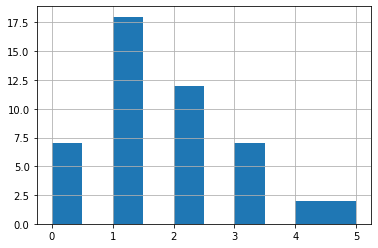

In [87]:
df['masculine_score'].hist()